In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Problem Statement

Stroke is the second leading cause of death   worldwide   and   remains   an important  health  burden both for the individuals   and   for   the   national healthcare   systems.   Potentially modifiable   risk   factors   for   stroke include hypertension, cardiac disease , glucose levels , etc 



# Goal

 This project is aimed to derive a model equation for developing a stroke  pre-diagnosis algorithm with the potentially modifiable risk factors

# Import Libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

# 1) Reading and Understanding the data

**1. Importing Data using pandas library**

In [ ]:
path='/content/drive/MyDrive/machine_learning/ML_project/stroke/healthcare-dataset-stroke-data.csv'
df=pd.read_csv(path)

**2. Understanding the Structure of Data**

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


1.The bmi of 67% of patients lies between the range 21 to 37
2. 97% bmi ranges from 13 to 44.5 
3. The range 5.34 to 52.4 contains 99% bmi values.
4. The data in bmi column is slightly right skewed and contains outliers. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


**from df.info(),we got to know that only the BMI column has null values**

# Data Visualisation

In [ ]:
features_cat = ['gender','hypertension','heart_disease','ever_married',
                'work_type','Residence_type','smoking_status']

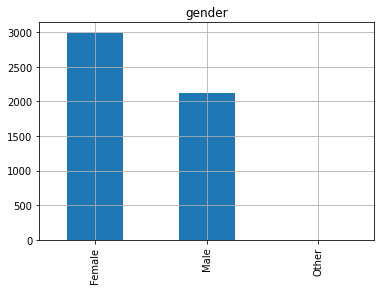

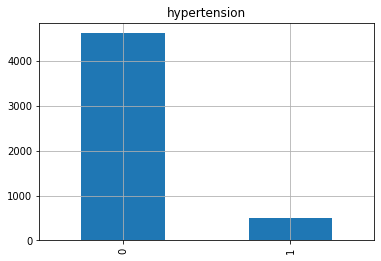

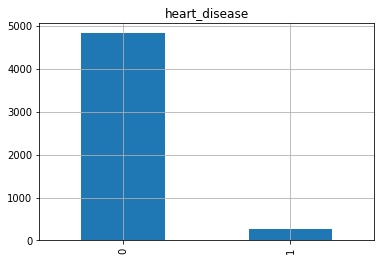

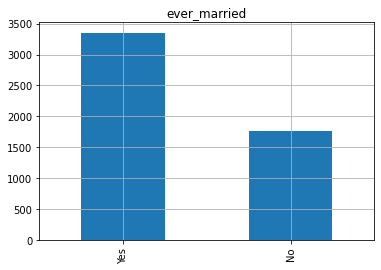

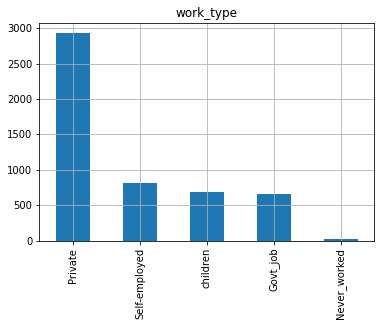

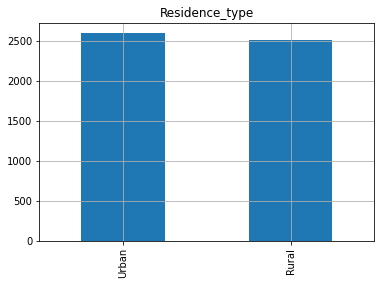

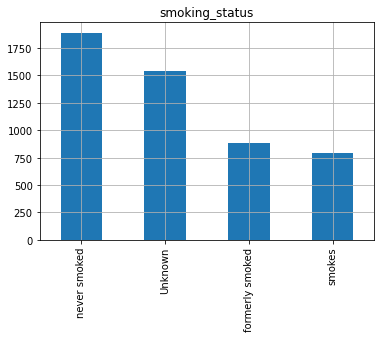

In [ ]:
for f in features_cat:
    df[f].value_counts().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

*   **0 represents no stroke** 
*   **1 represents stroke**



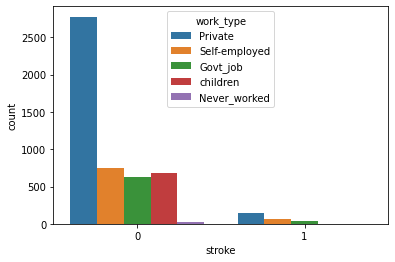

In [ ]:
sns.countplot(data=df,x='stroke',hue='work_type');

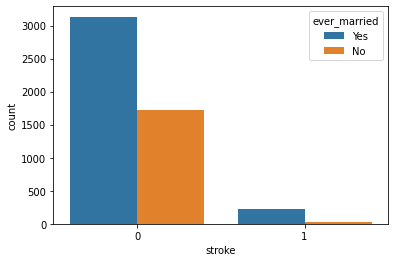

In [ ]:
sns.countplot(data=df,x='stroke',hue='ever_married');

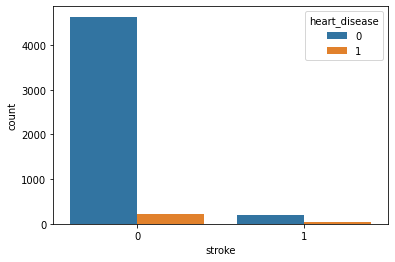

In [ ]:
sns.countplot(data=df,x='stroke',hue='heart_disease');

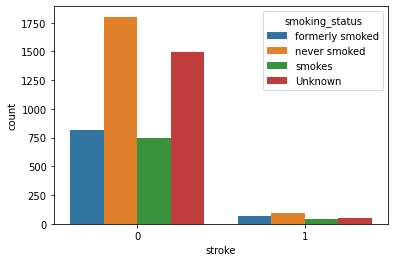

In [ ]:
sns.countplot(data=df,x='stroke',hue='smoking_status');

(10.0, 100.0)

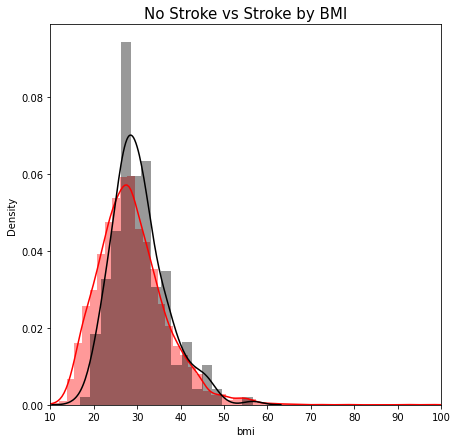

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df[df['stroke'] == 0]['bmi'],color='red')
sns.distplot(df[df['stroke'] == 1]['bmi'],color='black')

plt.title('No Stroke vs Stroke by BMI',fontsize=15)
plt.xlim([10,100])

(30.0, 330.0)

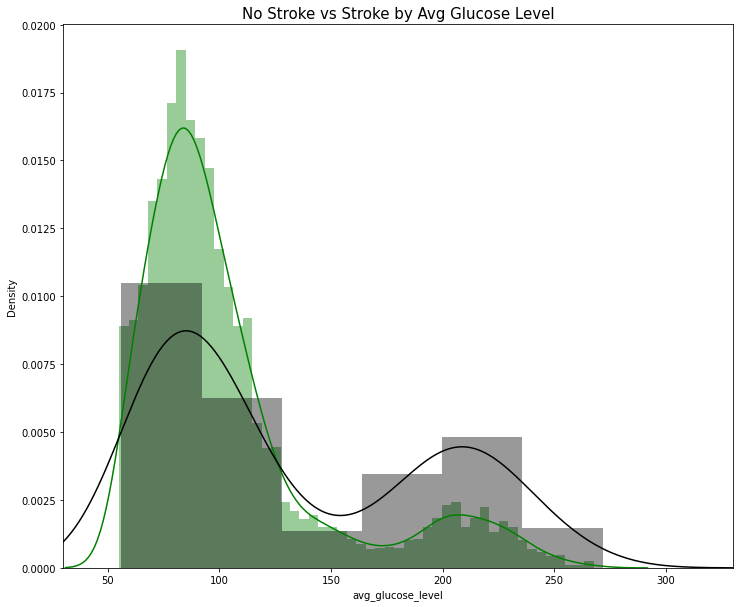

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(df[df['stroke'] == 0]['avg_glucose_level'],color='green')
sns.distplot(df[df['stroke'] == 1]['avg_glucose_level'],color='black')
plt.title('No Stroke vs Stroke by Avg Glucose Level',fontsize=15)
plt.xlim([30,330])

(0.0, 100.0)

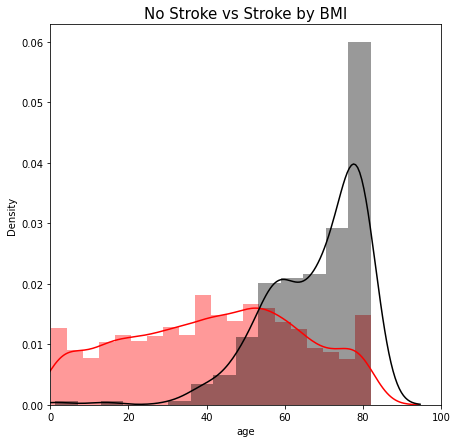

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df[df['stroke'] == 0]['age'],color='red')
sns.distplot(df[df['stroke'] == 1]['age'],color='black')

plt.title('No Stroke vs Stroke by BMI',fontsize=15)
plt.xlim([0,100])

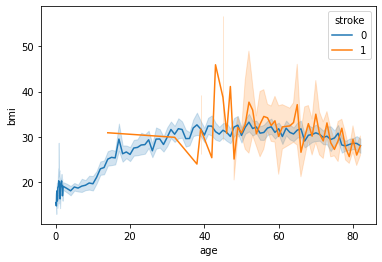

In [ ]:
sns.lineplot(x=df['age'],y=df['bmi'],hue=df['stroke'])

Text(0.5, 1.0, '')

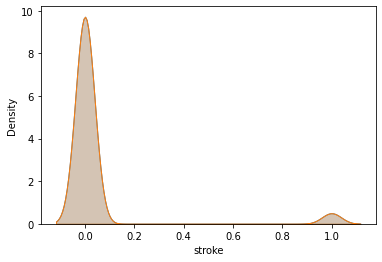

In [ ]:
sns.kdeplot(data=df['stroke'], label=1, shade=True)
sns.kdeplot(data=df['stroke'], label=0, shade=True)

# Add title
plt.title("")

### Handling Missing Values

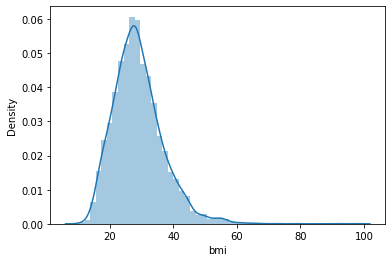

In [ ]:
sns.distplot(df['bmi']);

In [ ]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

 *   The data in bmi column is slightly right skewed and contains outliers. 
 *   values above 55 or 60 can be considered as outliers.
 





In [ ]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

### Handlilng Outliers

### Plotting a boxplot 

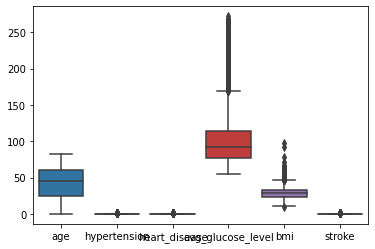

In [ ]:
sns.boxplot(data=df)

In [ ]:
33.1-23.5

9.600000000000001

In [ ]:
up=33.1+1.5*(33.1-23.5)
up             

47.5

In [ ]:
from scipy import stats

R_q1 = df['avg_glucose_level'].quantile(q=0.25)
R_q3 = df['avg_glucose_level'].quantile(q=0.75)
print('1st quartile = {} \n3rd quartile range = {} \ninter quartile range = {} '.format(R_q1,R_q3,stats.iqr(df['avg_glucose_level'])))

1st quartile = 77.245 
3rd quartile range = 114.09 
inter quartile range = 36.845 


In [ ]:
lower_outlier = R_q1-1.5*(R_q3-R_q1)
upper_outlier = R_q3+1.5*(R_q3-R_q1)

print('lower outlier = ',lower_outlier)
print('uppper outlier = ',upper_outlier)

lower outlier =  21.977500000000006
uppper outlier =  169.35750000000002


In [ ]:
print('Number of upper outlier =  ',df[df['avg_glucose_level']>7]['avg_glucose_level'].count())
print('Number of lower outlier =  ',df[df['avg_glucose_level']<-1]['avg_glucose_level'].count())

Number of upper outlier =   5110
Number of lower outlier =   0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [ ]:
X=df.drop('stroke',axis=1)
y=df['stroke']

In [ ]:
ct=ColumnTransformer(
    transformers=[(
        "encoder",
        OrdinalEncoder(),
        ['gender','smoking_status','work_type','Residence_type','ever_married'],
    )],
    remainder='passthrough'
)

X=ct.fit_transform(X)

In [ ]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=40,stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std=StandardScaler().fit(X_train)
X_train=std.transform(X_train)
X_test=std.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

## Decision Tree 

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [ ]:
dt.score(X_train,y_train)

1.0

In [ ]:
dt.score(X_test,y_test)

0.9092331768388107

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1216
           1       0.14      0.16      0.15        62

    accuracy                           0.91      1278
   macro avg       0.55      0.55      0.55      1278
weighted avg       0.92      0.91      0.91      1278



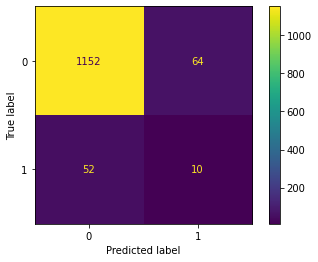

In [ ]:
plot_confusion_matrix(dt,X_test,y_test)

In [ ]:
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)

In [ ]:
lg.score(X_train,y_train)

0.9512004175365344

In [ ]:
lg.score(X_test,y_test)

0.9514866979655712

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



In [ ]:
cm=confusion_matrix(y_test, y_pred)

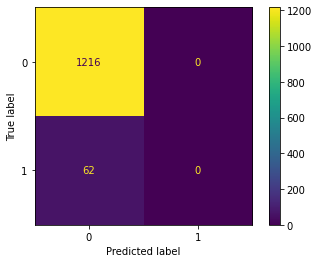

In [ ]:
plot_confusion_matrix(lg, X_test, y_test)  

In [ ]:
sv=SVC(kernel='rbf',gamma='auto')
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)

In [ ]:
sv.score(X_train,y_train)

0.9512004175365344

In [ ]:
sv.score(X_test,y_test)

0.9514866979655712

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



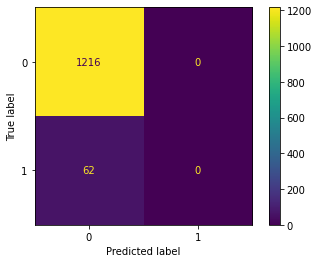

In [ ]:
plot_confusion_matrix(sv,X_test,y_test)

In [ ]:
trainac = []
testac = []

for i in range(1,31):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)

  trainac.append(knn.score(X_train, y_train))
  testac.append(knn.score(X_test, y_test))

In [ ]:
dic = {
    "n":np.arange(1,31),
    "train":trainac,
    "test":testac
}

hp = pd.DataFrame(dic)
hp

,n,train,test
0,1,1.000000,0.920188
1,2,0.954332,0.943662
2,3,0.956420,0.938967
3,4,0.951983,0.950704
4,5,0.952244,0.949922
5,6,0.951461,0.952269
6,7,0.951461,0.951487
7,8,0.951200,0.951487
8,9,0.951461,0.950704
9,10,0.951200,0.951487


In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
ypred = knn.predict(X_test)

In [ ]:
knn.score(X_train,y_train)

0.9514613778705637

In [ ]:
knn.score(X_test,y_test)

0.9522691705790297

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



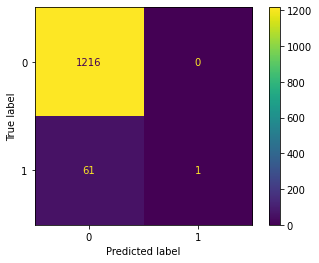

In [ ]:
plot_confusion_matrix(knn,X_test,y_test)